# Notebook 06: Therapeutic Target Prioritization

**Kairos Therapeutics ML Prototype V0**

---

## ⚠️ Public Repository Notice

**This notebook demonstrates Kairos Therapeutics' target prioritization methodology using synthetic data.**

All gene names, scores, and rankings shown are **illustrative placeholders** designed to demonstrate our computational approach. Actual therapeutic targets, priority scores, and strategic decisions are maintained in our internal pipeline.

---

## Strategic Context

**Goal:** Demonstrate how Kairos prioritizes MSC-deliverable therapeutic candidates using a systematic, multi-factor scoring approach.

## Prioritization Framework

Our prioritization methodology evaluates candidates across four equally-weighted dimensions:

| Factor | Weight | Rationale |
|--------|--------|----------|
| **Effect Size** | 25% | Magnitude of disease dysregulation (|log2FC|) |
| **Aging Evidence** | 25% | Strength of connection to aging biology |
| **Risk Assessment** | 25% | Biological interpretability and context |
| **Druggability** | 25% | Existing therapeutic approaches available |

## Tier Definitions

| Tier | Score Range | Description |
|------|-------------|-------------|
| **Tier 1: Lead** | ≥70 | Immediate validation candidates |
| **Tier 2: Development** | 50-69 | Secondary pipeline opportunities |
| **Tier 3: Research** | <50 | Longer-term exploration |

## Inputs
- Secreted candidates from age-disease intersection analysis
- Aging hallmark annotations
- Risk flag assessments

## Outputs
- `prioritized_targets.csv` — Full prioritization data
- `target_prioritization.png` — Visualization
- `therapeutic_targets_summary.txt` — Report

---

## Author
Kairos Therapeutics | Computational Biology Team

## Version
v0.1 (Public Methodology Demo) | December 2025

---
## Cell 1: Setup and Configuration

In [1]:
"""
CELL 1: SETUP AND CONFIGURATION
================================
Initialize environment and create synthetic demonstration data.

NOTE: In the internal Kairos pipeline, this cell loads real candidate
genes from upstream analysis (Notebook 05: Age-Disease Intersection).
"""

import os
import warnings
from pathlib import Path
from datetime import datetime

warnings.filterwarnings('ignore')

# Core data science
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility of synthetic data
np.random.seed(42)

# Set plotting defaults
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11

# --- Determine paths ---
NOTEBOOK_DIR = Path(os.getcwd())
if NOTEBOOK_DIR.name == 'notebooks':
    PROJECT_ROOT = NOTEBOOK_DIR.parent
else:
    PROJECT_ROOT = NOTEBOOK_DIR

DATA_PROCESSED = PROJECT_ROOT / 'data' / 'processed'
FIGURES_DIR = PROJECT_ROOT / 'reports' / 'figures'
REPORTS_DIR = PROJECT_ROOT / 'reports'

# Create output directories
FIGURES_DIR.mkdir(parents=True, exist_ok=True)
REPORTS_DIR.mkdir(parents=True, exist_ok=True)
DATA_PROCESSED.mkdir(parents=True, exist_ok=True)

print("="*70)
print("NOTEBOOK 06: THERAPEUTIC TARGET PRIORITIZATION")
print("PUBLIC METHODOLOGY DEMONSTRATION")
print("="*70)
print()
print("⚠️  This notebook uses SYNTHETIC DATA for demonstration purposes.")
print("    Actual targets and scores are maintained in internal pipeline.")
print()
print(f"Project root: {PROJECT_ROOT}")
print(f"Started: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print()
print("Cell 1 complete. Ready for Cell 2.")

NOTEBOOK 06: THERAPEUTIC TARGET PRIORITIZATION
PUBLIC METHODOLOGY DEMONSTRATION

⚠️  This notebook uses SYNTHETIC DATA for demonstration purposes.
    Actual targets and scores are maintained in internal pipeline.

Project root: C:\Users\povan\Kairos_Therapeutics
Started: 2025-12-26 23:37:50

Cell 1 complete. Ready for Cell 2.


---
## Cell 2: Generate Synthetic Demonstration Data

This cell creates anonymized placeholder data to demonstrate our prioritization methodology.

**In the internal Kairos pipeline:**
- Real gene symbols are loaded from upstream analysis
- Actual differential expression values are used
- Biological annotations come from curated databases

In [2]:
"""
CELL 2: GENERATE SYNTHETIC DEMONSTRATION DATA
=============================================
Create anonymized candidates for methodology demonstration.

NOTE: In the internal Kairos pipeline, this section operates on real
candidate genes identified from age-disease intersection analysis.
"""

print("GENERATING SYNTHETIC DEMONSTRATION DATA")
print("="*70)
print()
print("⚠️  All data below is SYNTHETIC and for demonstration only.")
print()

# -------------------------------------------------------------------------
# SYNTHETIC DATA GENERATION
# -------------------------------------------------------------------------
# This creates realistic-looking but anonymized data to demonstrate
# our prioritization methodology without exposing actual targets.
# -------------------------------------------------------------------------

N_CANDIDATES = 19  # Typical number from our pipeline

# Generate anonymous target names
target_names = [f"TARGET_{chr(65+i)}" for i in range(N_CANDIDATES)]  # TARGET_A, TARGET_B, etc.

# Generate synthetic expression data (deterministic with seed)
np.random.seed(42)
log2fc_values = np.concatenate([
    np.random.uniform(1.0, 3.5, 15),   # Disease-elevated (positive)
    np.random.uniform(-3.0, -1.0, 4)   # Protective loss (negative)
])
np.random.shuffle(log2fc_values)

# Assign directions based on log2FC
directions = ['Up in Disease' if x > 0 else 'Down in Disease' for x in log2fc_values]

# Generate synthetic FDR values (all significant)
fdr_values = np.random.uniform(0.0001, 0.01, N_CANDIDATES)

# Assign hallmark categories (representative distribution)
hallmarks = [
    'ECM & Tissue Integrity', 'ECM & Tissue Integrity', 'ECM & Tissue Integrity',
    'ECM & Tissue Integrity', 'ECM & Tissue Integrity', 'ECM & Tissue Integrity',
    'Angiogenesis / Trophic', 'Angiogenesis / Trophic', 'Angiogenesis / Trophic',
    'Angiogenesis / Trophic', 'Angiogenesis / Trophic',
    'Inflammation / Immune', 'Inflammation / Immune',
    'Other / Mixed', 'Other / Mixed', 'Other / Mixed', 'Other / Mixed',
    'Senescence / Cell Cycle', 'Senescence / Cell Cycle'
]

# Assign risk flags (representative distribution)
risk_flags = [
    'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
    'Low', 'Low', 'Low', 'Low', 'Low',
    'Evaluate carefully', 'Evaluate carefully', 'Evaluate carefully',
    'Context-dependent'
]

# Assign aging database membership (synthetic)
in_genage = [i < 3 for i in range(N_CANDIDATES)]  # First 3
in_senmayo = [i < 10 for i in range(N_CANDIDATES)]  # First 10
in_sasp = [True] * N_CANDIDATES  # All are SASP (secreted)

# Create synthetic demonstration dataframe
secreted_candidates = pd.DataFrame({
    'gene': target_names,
    'log2FC_mock': log2fc_values.round(2),
    'FDR_mock': fdr_values,
    'direction': directions,
    'aging_hallmark': hallmarks,
    'risk_flag': risk_flags,
    'in_GenAge': in_genage,
    'in_SenMayo': in_senmayo,
    'in_SASP': in_sasp,
})

# Display synthetic data summary
print(f"Synthetic candidates generated: {len(secreted_candidates)}")
print()

print("DIRECTION BREAKDOWN (Synthetic):")
print("-"*40)
for direction in secreted_candidates['direction'].unique():
    count = len(secreted_candidates[secreted_candidates['direction'] == direction])
    print(f"   {direction}: {count}")
print()

print("HALLMARK BREAKDOWN (Synthetic):")
print("-"*40)
for hallmark, count in secreted_candidates['aging_hallmark'].value_counts().items():
    print(f"   {hallmark}: {count}")
print()

print("RISK FLAG BREAKDOWN (Synthetic):")
print("-"*40)
for risk, count in secreted_candidates['risk_flag'].value_counts().items():
    print(f"   {risk}: {count}")
print()

print("SYNTHETIC CANDIDATES PREVIEW:")
print("-"*70)
print(secreted_candidates[['gene', 'log2FC_mock', 'direction', 'aging_hallmark']].head(10).to_string(index=False))
print()
print("Cell 2 complete. Ready for Cell 3.")

GENERATING SYNTHETIC DEMONSTRATION DATA

⚠️  All data below is SYNTHETIC and for demonstration only.

Synthetic candidates generated: 19

DIRECTION BREAKDOWN (Synthetic):
----------------------------------------
   Down in Disease: 4
   Up in Disease: 15

HALLMARK BREAKDOWN (Synthetic):
----------------------------------------
   ECM & Tissue Integrity: 6
   Angiogenesis / Trophic: 5
   Other / Mixed: 4
   Inflammation / Immune: 2
   Senescence / Cell Cycle: 2

RISK FLAG BREAKDOWN (Synthetic):
----------------------------------------
   Low: 15
   Evaluate carefully: 3
   Context-dependent: 1

SYNTHETIC CANDIDATES PREVIEW:
----------------------------------------------------------------------
    gene  log2FC_mock       direction         aging_hallmark
TARGET_A        -1.95 Down in Disease ECM & Tissue Integrity
TARGET_B         3.38   Up in Disease ECM & Tissue Integrity
TARGET_C         1.39   Up in Disease ECM & Tissue Integrity
TARGET_D         1.94   Up in Disease ECM & Tissue Int

---
## Cell 3: Druggability Annotation Framework

This cell demonstrates our druggability assessment methodology.

### Druggability Categories

| Level | Definition | Examples |
|-------|------------|----------|
| **High** | Approved drugs exist OR late-stage clinical candidates | MMPs, VEGF pathway |
| **Medium** | Early-stage candidates OR well-validated target biology | Growth factors, cytokines |
| **Low** | Novel target, limited intervention strategies | Orphan receptors, novel ECM |

### MSC Delivery Considerations

For each target, we also assess MSC-based delivery feasibility:
- **Restoration targets**: Can MSCs secrete this factor?
- **Inhibition targets**: Can MSCs deliver an antagonist/inhibitor?

In [3]:
"""
CELL 3: DRUGGABILITY ANNOTATION FRAMEWORK
=========================================
Demonstrate druggability assessment methodology.

NOTE: In the internal Kairos pipeline, druggability annotations are
curated from DrugBank, DGIdb, and literature review for each real target.
"""

print("DRUGGABILITY ANNOTATION FRAMEWORK")
print("="*70)
print()

# -------------------------------------------------------------------------
# DRUGGABILITY ANNOTATION METHODOLOGY
# -------------------------------------------------------------------------
# Our druggability assessment considers:
#   1. Existing approved therapeutics targeting the gene/protein
#   2. Clinical-stage drug candidates
#   3. Preclinical validation and tool compounds
#   4. Target class druggability (kinases, GPCRs, proteases, etc.)
#   5. MSC-based delivery feasibility
#
# Sources: DrugBank, DGIdb, ClinicalTrials.gov, literature
# -------------------------------------------------------------------------

print("DRUGGABILITY ASSESSMENT CRITERIA:")
print("-"*70)
print()
print("HIGH DRUGGABILITY:")
print("   • Approved drugs targeting this gene/protein")
print("   • Phase 2/3 clinical candidates")
print("   • Well-established target class (e.g., kinases, MMPs)")
print()
print("MEDIUM DRUGGABILITY:")
print("   • Phase 1 clinical candidates")
print("   • Strong preclinical validation")
print("   • Validated biology with clear intervention strategy")
print()
print("LOW DRUGGABILITY:")
print("   • No existing drug candidates")
print("   • Novel or poorly characterized target")
print("   • Challenging target class (e.g., protein-protein interactions)")
print()

# -------------------------------------------------------------------------
# SYNTHETIC DRUGGABILITY ASSIGNMENT
# -------------------------------------------------------------------------
# For demonstration, we assign druggability levels based on
# a representative distribution typical of secretome analysis.
# -------------------------------------------------------------------------

# Assign synthetic druggability (deterministic for reproducibility)
np.random.seed(42)
druggability_levels = np.random.choice(
    ['High', 'Medium', 'Low'],
    size=len(secreted_candidates),
    p=[0.25, 0.45, 0.30]  # Representative distribution
)

secreted_candidates['druggability_mock'] = druggability_levels

# Generate synthetic MSC strategy annotations
def generate_msc_strategy(row):
    """Generate illustrative MSC delivery strategy."""
    if row['direction'] == 'Up in Disease':
        strategies = [
            'MSC-delivered inhibitor/antagonist',
            'MSC-secreted neutralizing factor',
            'MSC-delivered blocking peptide'
        ]
    else:
        strategies = [
            'MSC-delivered recombinant factor',
            'MSC overexpression of target',
            'MSC-secreted restoration therapy'
        ]
    return np.random.choice(strategies)

secreted_candidates['msc_strategy_mock'] = secreted_candidates.apply(generate_msc_strategy, axis=1)

# Display druggability distribution
print("SYNTHETIC DRUGGABILITY DISTRIBUTION:")
print("-"*40)
for level, count in secreted_candidates['druggability_mock'].value_counts().sort_index().items():
    print(f"   {level}: {count} targets")
print()

print("⚠️  Druggability assignments shown are SYNTHETIC.")
print("    Real annotations use curated database lookups.")
print()
print("Cell 3 complete. Ready for Cell 4.")

DRUGGABILITY ANNOTATION FRAMEWORK

DRUGGABILITY ASSESSMENT CRITERIA:
----------------------------------------------------------------------

HIGH DRUGGABILITY:
   • Approved drugs targeting this gene/protein
   • Phase 2/3 clinical candidates
   • Well-established target class (e.g., kinases, MMPs)

MEDIUM DRUGGABILITY:
   • Phase 1 clinical candidates
   • Strong preclinical validation
   • Validated biology with clear intervention strategy

LOW DRUGGABILITY:
   • No existing drug candidates
   • Novel or poorly characterized target
   • Challenging target class (e.g., protein-protein interactions)

SYNTHETIC DRUGGABILITY DISTRIBUTION:
----------------------------------------
   High: 7 targets
   Low: 6 targets
   Medium: 6 targets

⚠️  Druggability assignments shown are SYNTHETIC.
    Real annotations use curated database lookups.

Cell 3 complete. Ready for Cell 4.


---
## Cell 4: Composite Priority Score Calculation

This cell demonstrates our multi-factor scoring methodology.

### Scoring Formula

```
Priority Score = (Effect Size × 0.25) + (Aging Evidence × 0.25) + 
                 (Risk Score × 0.25) + (Druggability × 0.25)
```

Each component is normalized to a 0-100 scale before weighting.

In [4]:
"""
CELL 4: COMPOSITE PRIORITY SCORE CALCULATION
============================================
Demonstrate multi-factor prioritization scoring.

NOTE: In the internal Kairos pipeline, this scoring operates on
real expression values and curated annotations.
"""

print("CALCULATING PRIORITY SCORES (Synthetic)")
print("="*70)
print()

# -------------------------------------------------------------------------
# SCORING METHODOLOGY
# -------------------------------------------------------------------------
# Our prioritization uses four equally-weighted factors:
#
#   1. Effect Size (25%): |log2FC| normalized to 0-100
#      Rationale: Larger dysregulation = stronger therapeutic signal
#
#   2. Aging Evidence (25%): Membership in aging databases
#      Rationale: Connection to fundamental aging biology
#
#   3. Risk Assessment (25%): Biological interpretability
#      Rationale: Clear mechanistic understanding reduces risk
#
#   4. Druggability (25%): Existing therapeutic approaches
#      Rationale: Prior validation accelerates development
# -------------------------------------------------------------------------

WEIGHTS = {
    'effect_size': 0.25,
    'aging_evidence': 0.25,
    'risk_assessment': 0.25,
    'druggability': 0.25
}

print("SCORING WEIGHTS:")
print("-"*40)
for component, weight in WEIGHTS.items():
    print(f"   {component.replace('_', ' ').title()}: {weight*100:.0f}%")
print()

# --- Component 1: Effect Size Score (0-100) ---
max_fc = secreted_candidates['log2FC_mock'].abs().max()
secreted_candidates['effect_size_score'] = (
    secreted_candidates['log2FC_mock'].abs() / max_fc * 100
).round(1)

# --- Component 2: Aging Evidence Score (0-100) ---
# GenAge membership = 50 points, SenMayo = 25, SASP = 25
secreted_candidates['aging_evidence_score'] = (
    secreted_candidates['in_GenAge'].astype(int) * 50 +
    secreted_candidates['in_SenMayo'].astype(int) * 25 +
    secreted_candidates['in_SASP'].astype(int) * 25
)

# --- Component 3: Risk Score (0-100) ---
# Low risk = 100, Evaluate carefully = 50, Context-dependent = 25
risk_score_map = {
    'Low': 100,
    'Evaluate carefully': 50,
    'Context-dependent': 25,
    'Inflammatory SASP': 25
}
secreted_candidates['risk_score'] = secreted_candidates['risk_flag'].map(risk_score_map)

# --- Component 4: Druggability Score (0-100) ---
druggability_score_map = {
    'High': 100,
    'Medium': 60,
    'Low': 30
}
secreted_candidates['druggability_score'] = secreted_candidates['druggability_mock'].map(druggability_score_map)

# --- Calculate Composite Priority Score ---
secreted_candidates['priority_score_mock'] = (
    secreted_candidates['effect_size_score'] * WEIGHTS['effect_size'] +
    secreted_candidates['aging_evidence_score'] * WEIGHTS['aging_evidence'] +
    secreted_candidates['risk_score'] * WEIGHTS['risk_assessment'] +
    secreted_candidates['druggability_score'] * WEIGHTS['druggability']
).round(1)

# Sort by priority score
secreted_candidates = secreted_candidates.sort_values('priority_score_mock', ascending=False).reset_index(drop=True)

# Display scoring breakdown
print("COMPONENT SCORES (Synthetic - Top 10):")
print("-"*90)
print(f"{'Target':<12} {'Effect':>8} {'Aging':>8} {'Risk':>8} {'Drug':>8} {'PRIORITY':>10}")
print("-"*90)
for _, row in secreted_candidates.head(10).iterrows():
    print(f"{row['gene']:<12} {row['effect_size_score']:>8.1f} {row['aging_evidence_score']:>8.0f} "
          f"{row['risk_score']:>8.0f} {row['druggability_score']:>8.0f} {row['priority_score_mock']:>10.1f}")

print()
print(f"Score range: {secreted_candidates['priority_score_mock'].min():.1f} - {secreted_candidates['priority_score_mock'].max():.1f}")
print()
print("⚠️  All scores shown are SYNTHETIC for methodology demonstration.")
print()
print("Cell 4 complete. Ready for Cell 5.")

CALCULATING PRIORITY SCORES (Synthetic)

SCORING WEIGHTS:
----------------------------------------
   Effect Size: 25%
   Aging Evidence: 25%
   Risk Assessment: 25%
   Druggability: 25%

COMPONENT SCORES (Synthetic - Top 10):
------------------------------------------------------------------------------------------
Target         Effect    Aging     Risk     Drug   PRIORITY
------------------------------------------------------------------------------------------
TARGET_F         92.7       50      100      100       85.7
TARGET_B         98.8      100      100       30       82.2
TARGET_A         57.0      100      100       60       79.2
TARGET_G         40.6       50      100      100       72.6
TARGET_N         62.6       25      100      100       71.9
TARGET_I         73.1       50      100       60       70.8
TARGET_E         30.7       50      100      100       70.2
TARGET_C         40.6      100      100       30       67.6
TARGET_H         90.1       50      100       30   

---
## Cell 5: Priority Tier Assignment

Targets are assigned to strategic tiers based on their composite priority score.

### Tier Strategy

| Tier | Focus | Timeline |
|------|-------|----------|
| **Tier 1** | Lead validation studies | Near-term |
| **Tier 2** | Development pipeline | Mid-term |
| **Tier 3** | Research exploration | Long-term |

In [5]:
"""
CELL 5: PRIORITY TIER ASSIGNMENT
================================
Assign targets to strategic tiers for pipeline planning.
"""

print("CREATING PRIORITY TIERS (Synthetic)")
print("="*70)
print()

# -------------------------------------------------------------------------
# TIER DEFINITIONS
# -------------------------------------------------------------------------
#
# Tier 1: Lead Candidates (Score >= 70)
#   - Highest priority for immediate validation
#   - Strong effect, good druggability, low biological risk
#   - Clear MSC delivery strategy
#
# Tier 2: Development Candidates (Score 50-69)
#   - Secondary pipeline opportunities
#   - Good potential but require additional validation
#   - May have medium druggability or higher risk
#
# Tier 3: Research Candidates (Score < 50)
#   - Longer-term exploration targets
#   - Novel biology requiring further characterization
#   - Lower druggability or complex biology
# -------------------------------------------------------------------------

def assign_tier(score):
    """Assign priority tier based on composite score."""
    if score >= 70:
        return 'Tier 1: Lead'
    elif score >= 50:
        return 'Tier 2: Development'
    else:
        return 'Tier 3: Research'

secreted_candidates['priority_tier'] = secreted_candidates['priority_score_mock'].apply(assign_tier)

# Display tier distribution
print("TIER DISTRIBUTION (Synthetic):")
print("-"*40)
tier_counts = secreted_candidates['priority_tier'].value_counts().sort_index()
for tier, count in tier_counts.items():
    print(f"   {tier}: {count} targets")
print()

# Display by tier
for tier in ['Tier 1: Lead', 'Tier 2: Development', 'Tier 3: Research']:
    tier_df = secreted_candidates[secreted_candidates['priority_tier'] == tier]
    if len(tier_df) > 0:
        print(f"\n{tier.upper()} (Synthetic)")
        print("-"*70)
        print(f"{'Rank':<6} {'Target':<12} {'Score':>8} {'Direction':<18} {'Druggability':<12}")
        print("-"*70)
        for rank, (_, row) in enumerate(tier_df.iterrows(), 1):
            print(f"{rank:<6} {row['gene']:<12} {row['priority_score_mock']:>8.1f} "
                  f"{row['direction']:<18} {row['druggability_mock']:<12}")

print()
print("⚠️  Tier assignments shown are based on SYNTHETIC scores.")
print()
print("Cell 5 complete. Ready for Cell 6.")

CREATING PRIORITY TIERS (Synthetic)

TIER DISTRIBUTION (Synthetic):
----------------------------------------
   Tier 1: Lead: 7 targets
   Tier 2: Development: 11 targets
   Tier 3: Research: 1 targets


TIER 1: LEAD (Synthetic)
----------------------------------------------------------------------
Rank   Target          Score Direction          Druggability
----------------------------------------------------------------------
1      TARGET_F         85.7 Up in Disease      High        
2      TARGET_B         82.2 Up in Disease      Low         
3      TARGET_A         79.2 Down in Disease    Medium      
4      TARGET_G         72.6 Up in Disease      High        
5      TARGET_N         71.9 Down in Disease    High        
6      TARGET_I         70.8 Up in Disease      Medium      
7      TARGET_E         70.2 Up in Disease      High        

TIER 2: DEVELOPMENT (Synthetic)
----------------------------------------------------------------------
Rank   Target          Score Directio

---
## Cell 6: Prioritization Visualization

Generate investor-ready visualizations demonstrating our prioritization approach.

GENERATING PRIORITIZATION VISUALIZATION

   Saved: C:\Users\povan\Kairos_Therapeutics\reports\figures\target_prioritization_methodology.png


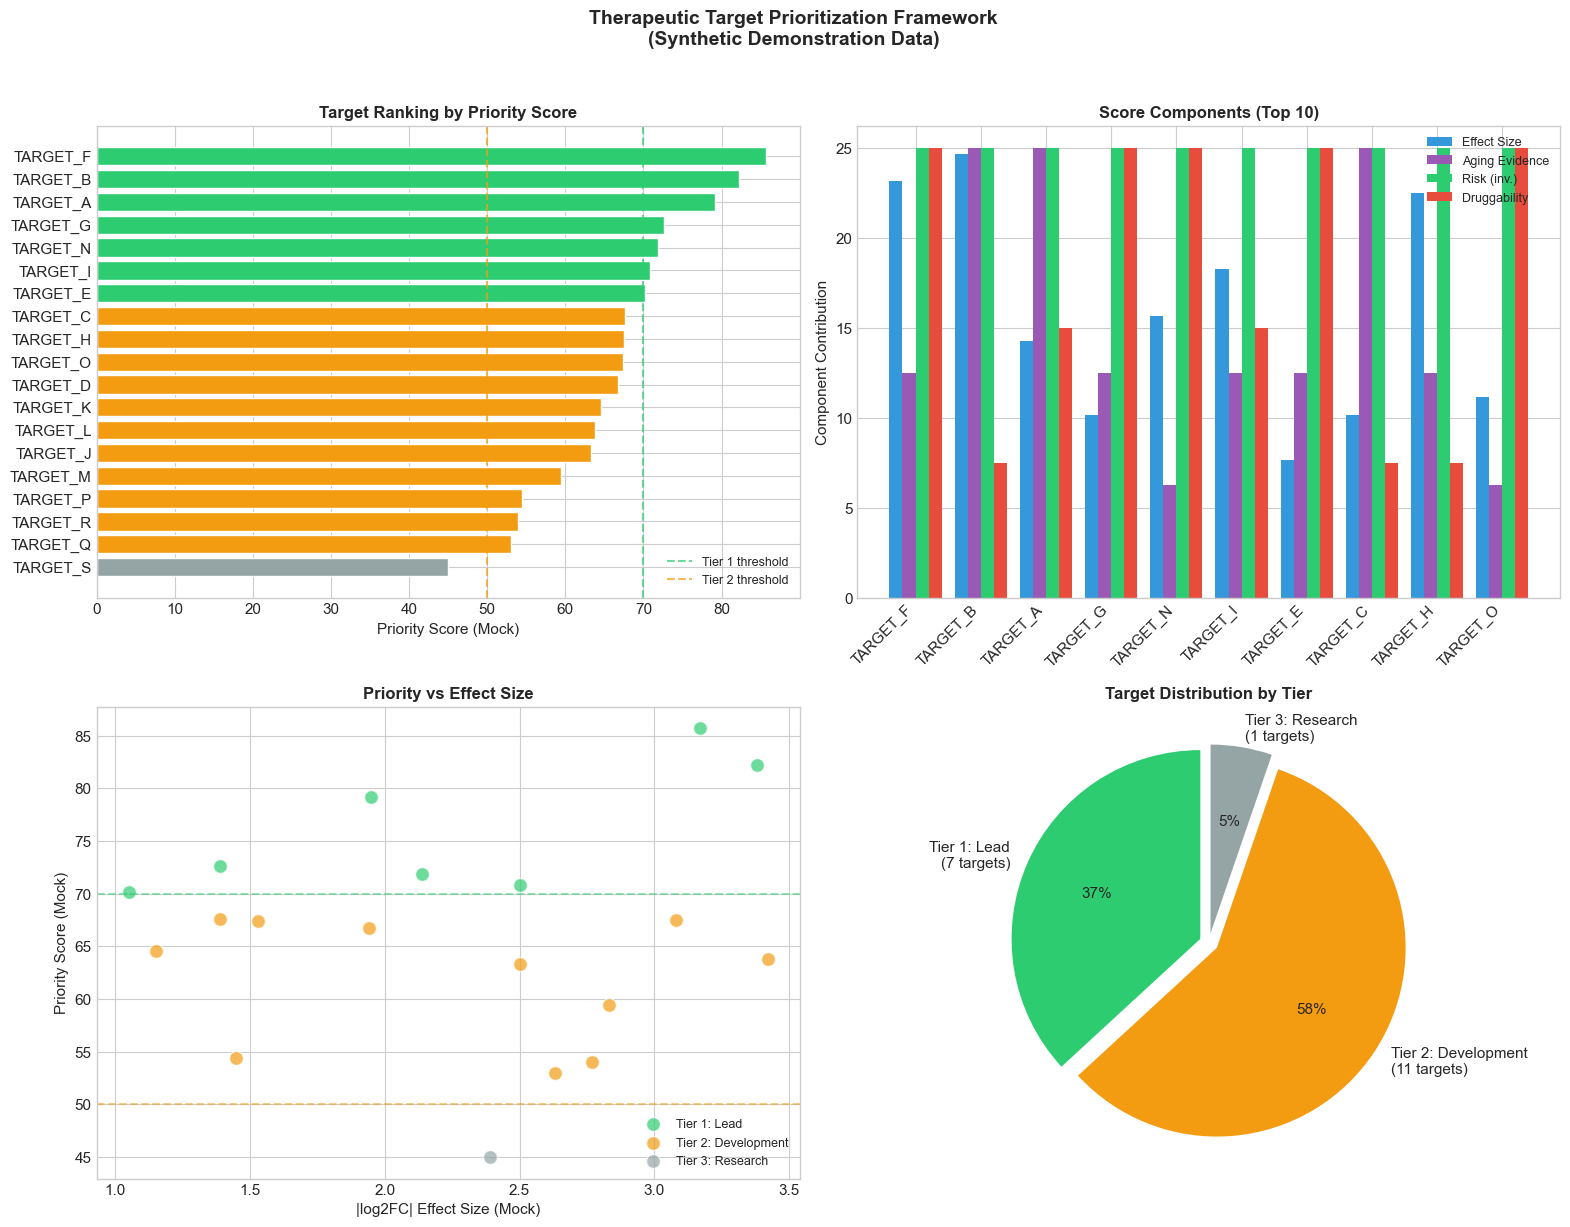


⚠️  Visualization uses SYNTHETIC data for methodology demonstration.

Cell 6 complete. Ready for Cell 7.


In [6]:
"""
CELL 6: PRIORITIZATION VISUALIZATION
====================================
Create investor-ready visualization of prioritization methodology.
"""

print("GENERATING PRIORITIZATION VISUALIZATION")
print("="*70)
print()

# Create figure with multiple panels
fig = plt.figure(figsize=(16, 12))
fig.suptitle('Therapeutic Target Prioritization Framework\n(Synthetic Demonstration Data)', 
             fontsize=14, fontweight='bold', y=1.02)

# --- Panel A: Priority Score Bar Chart ---
ax1 = fig.add_subplot(2, 2, 1)

# Color by tier
tier_colors = {
    'Tier 1: Lead': '#2ECC71',
    'Tier 2: Development': '#F39C12',
    'Tier 3: Research': '#95A5A6'
}
colors = [tier_colors[tier] for tier in secreted_candidates['priority_tier']]

bars = ax1.barh(range(len(secreted_candidates)), secreted_candidates['priority_score_mock'], 
                color=colors, edgecolor='white')
ax1.set_yticks(range(len(secreted_candidates)))
ax1.set_yticklabels(secreted_candidates['gene'])
ax1.invert_yaxis()
ax1.set_xlabel('Priority Score (Mock)', fontsize=11)
ax1.set_title('Target Ranking by Priority Score', fontsize=12, fontweight='bold')
ax1.axvline(x=70, color='#2ECC71', linestyle='--', alpha=0.7, label='Tier 1 threshold')
ax1.axvline(x=50, color='#F39C12', linestyle='--', alpha=0.7, label='Tier 2 threshold')
ax1.legend(loc='lower right', fontsize=9)

# --- Panel B: Score Components Breakdown ---
ax2 = fig.add_subplot(2, 2, 2)

top10 = secreted_candidates.head(10).copy()
x = range(len(top10))
width = 0.2

ax2.bar([i - 1.5*width for i in x], top10['effect_size_score']/4, width, 
        label='Effect Size', color='#3498DB')
ax2.bar([i - 0.5*width for i in x], top10['aging_evidence_score']/4, width, 
        label='Aging Evidence', color='#9B59B6')
ax2.bar([i + 0.5*width for i in x], top10['risk_score']/4, width, 
        label='Risk (inv.)', color='#2ECC71')
ax2.bar([i + 1.5*width for i in x], top10['druggability_score']/4, width, 
        label='Druggability', color='#E74C3C')

ax2.set_xticks(x)
ax2.set_xticklabels(top10['gene'], rotation=45, ha='right')
ax2.set_ylabel('Component Contribution', fontsize=11)
ax2.set_title('Score Components (Top 10)', fontsize=12, fontweight='bold')
ax2.legend(loc='upper right', fontsize=9)

# --- Panel C: Priority vs Effect Size ---
ax3 = fig.add_subplot(2, 2, 3)

for tier, color in tier_colors.items():
    tier_data = secreted_candidates[secreted_candidates['priority_tier'] == tier]
    ax3.scatter(tier_data['log2FC_mock'].abs(), tier_data['priority_score_mock'], 
                c=color, s=100, alpha=0.7, label=tier, edgecolors='white')

ax3.set_xlabel('|log2FC| Effect Size (Mock)', fontsize=11)
ax3.set_ylabel('Priority Score (Mock)', fontsize=11)
ax3.set_title('Priority vs Effect Size', fontsize=12, fontweight='bold')
ax3.legend(loc='lower right', fontsize=9)
ax3.axhline(y=70, color='#2ECC71', linestyle='--', alpha=0.5)
ax3.axhline(y=50, color='#F39C12', linestyle='--', alpha=0.5)

# --- Panel D: Tier Distribution ---
ax4 = fig.add_subplot(2, 2, 4)

tier_counts_ordered = []
tier_labels = []
tier_colors_list = []
for tier in ['Tier 1: Lead', 'Tier 2: Development', 'Tier 3: Research']:
    count = len(secreted_candidates[secreted_candidates['priority_tier'] == tier])
    if count > 0:
        tier_counts_ordered.append(count)
        tier_labels.append(f"{tier}\n({count} targets)")
        tier_colors_list.append(tier_colors[tier])

wedges, texts, autotexts = ax4.pie(tier_counts_ordered, labels=tier_labels, colors=tier_colors_list,
                                   autopct='%1.0f%%', startangle=90, 
                                   explode=[0.05]*len(tier_counts_ordered))
ax4.set_title('Target Distribution by Tier', fontsize=12, fontweight='bold')

plt.tight_layout()

# Save figure
output_path = FIGURES_DIR / 'target_prioritization_methodology.png'
plt.savefig(output_path, dpi=150, bbox_inches='tight', facecolor='white', edgecolor='none')
print(f"   Saved: {output_path}")
plt.show()

print()
print("⚠️  Visualization uses SYNTHETIC data for methodology demonstration.")
print()
print("Cell 6 complete. Ready for Cell 7.")

---
## Cell 7: Export Results

Export prioritization results in formats suitable for:
- Downstream analysis (CSV)
- Investor demo (Streamlit-ready CSV)
- Documentation (Summary report)

In [7]:
"""
CELL 7: EXPORT RESULTS
======================
Export prioritization results for downstream use.

NOTE: In the internal Kairos pipeline, this exports real target
data to secured storage. Public exports use anonymized data only.
"""

print("EXPORTING RESULTS (Synthetic)")
print("="*70)
print()

# Add rank column
secreted_candidates['rank'] = range(1, len(secreted_candidates) + 1)

# Select columns for full export
export_columns = [
    'rank', 'gene', 'priority_score_mock', 'priority_tier',
    'log2FC_mock', 'direction', 'aging_hallmark', 'risk_flag',
    'druggability_mock', 'msc_strategy_mock',
    'effect_size_score', 'aging_evidence_score', 'risk_score', 'druggability_score'
]

export_df = secreted_candidates[export_columns].copy()

# Save full prioritization data
full_path = DATA_PROCESSED / 'prioritized_targets_demo.csv'
export_df.to_csv(full_path, index=False)
print(f"   Saved: {full_path}")

# Save streamlit-ready version (simplified)
streamlit_columns = ['rank', 'gene', 'priority_score_mock', 'priority_tier', 
                     'direction', 'druggability_mock', 'aging_hallmark']
streamlit_df = secreted_candidates[streamlit_columns].copy()
streamlit_path = DATA_PROCESSED / 'prioritized_targets_streamlit_demo.csv'
streamlit_df.to_csv(streamlit_path, index=False)
print(f"   Saved: {streamlit_path}")

print()
print(f"   Total targets exported: {len(export_df)}")
print()
print("⚠️  Exported data is SYNTHETIC for public demonstration.")
print()
print("Cell 7 complete. Ready for Cell 8.")

EXPORTING RESULTS (Synthetic)

   Saved: C:\Users\povan\Kairos_Therapeutics\data\processed\prioritized_targets_demo.csv
   Saved: C:\Users\povan\Kairos_Therapeutics\data\processed\prioritized_targets_streamlit_demo.csv

   Total targets exported: 19

⚠️  Exported data is SYNTHETIC for public demonstration.

Cell 7 complete. Ready for Cell 8.


---
## Cell 8: Generate Summary Report

In [8]:
"""
CELL 8: GENERATE SUMMARY REPORT
===============================
Create methodology summary report.
"""

print("GENERATING SUMMARY REPORT")
print("="*70)
print()

report_lines = []
report_lines.append("="*70)
report_lines.append("KAIROS THERAPEUTICS - TARGET PRIORITIZATION METHODOLOGY")
report_lines.append("PUBLIC DEMONSTRATION (Synthetic Data)")
report_lines.append(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
report_lines.append("="*70)
report_lines.append("")
report_lines.append("⚠️  This report demonstrates methodology using SYNTHETIC data.")
report_lines.append("    Actual targets and rankings are maintained internally.")
report_lines.append("")

report_lines.append("PRIORITIZATION METHODOLOGY")
report_lines.append("-"*40)
report_lines.append("  Composite score based on 4 equally-weighted factors:")
report_lines.append("    1. Effect Size (25%): Magnitude of dysregulation")
report_lines.append("    2. Aging Evidence (25%): Connection to aging biology")
report_lines.append("    3. Risk Assessment (25%): Biological interpretability")
report_lines.append("    4. Druggability (25%): Existing therapeutic approaches")
report_lines.append("")

report_lines.append("TIER DEFINITIONS")
report_lines.append("-"*40)
report_lines.append("  Tier 1 (Lead): Score >= 70")
report_lines.append("    - Immediate validation candidates")
report_lines.append("    - Strong effect, good druggability, low risk")
report_lines.append("")
report_lines.append("  Tier 2 (Development): Score 50-69")
report_lines.append("    - Secondary pipeline opportunities")
report_lines.append("    - Require additional validation")
report_lines.append("")
report_lines.append("  Tier 3 (Research): Score < 50")
report_lines.append("    - Longer-term exploration")
report_lines.append("    - Novel biology, lower druggability")
report_lines.append("")

report_lines.append("SYNTHETIC DATA SUMMARY")
report_lines.append("-"*40)
tier1 = len(secreted_candidates[secreted_candidates['priority_tier'] == 'Tier 1: Lead'])
tier2 = len(secreted_candidates[secreted_candidates['priority_tier'] == 'Tier 2: Development'])
tier3 = len(secreted_candidates[secreted_candidates['priority_tier'] == 'Tier 3: Research'])
report_lines.append(f"  Total candidates (demo): {len(secreted_candidates)}")
report_lines.append(f"  Tier 1 (demo): {tier1}")
report_lines.append(f"  Tier 2 (demo): {tier2}")
report_lines.append(f"  Tier 3 (demo): {tier3}")
report_lines.append("")

report_lines.append("OUTPUT FILES")
report_lines.append("-"*40)
report_lines.append("  prioritized_targets_demo.csv - Full synthetic data")
report_lines.append("  prioritized_targets_streamlit_demo.csv - Streamlit format")
report_lines.append("  target_prioritization_methodology.png - Visualization")
report_lines.append("")
report_lines.append("="*70)

# Print and save
report_text = "\n".join(report_lines)
print(report_text)

report_path = REPORTS_DIR / 'target_prioritization_methodology.txt'
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report_text)
print()
print(f"Report saved: {report_path}")
print()
print("Cell 8 complete. Ready for Cell 9.")

GENERATING SUMMARY REPORT

KAIROS THERAPEUTICS - TARGET PRIORITIZATION METHODOLOGY
PUBLIC DEMONSTRATION (Synthetic Data)
Generated: 2025-12-26 23:37:52

⚠️  This report demonstrates methodology using SYNTHETIC data.
    Actual targets and rankings are maintained internally.

PRIORITIZATION METHODOLOGY
----------------------------------------
  Composite score based on 4 equally-weighted factors:
    1. Effect Size (25%): Magnitude of dysregulation
    2. Aging Evidence (25%): Connection to aging biology
    3. Risk Assessment (25%): Biological interpretability
    4. Druggability (25%): Existing therapeutic approaches

TIER DEFINITIONS
----------------------------------------
  Tier 1 (Lead): Score >= 70
    - Immediate validation candidates
    - Strong effect, good druggability, low risk

  Tier 2 (Development): Score 50-69
    - Secondary pipeline opportunities
    - Require additional validation

  Tier 3 (Research): Score < 50
    - Longer-term exploration
    - Novel biology, low

---
## Cell 9: Final Checkpoint

In [9]:
"""
CELL 9: FINAL CHECKPOINT
========================
Summary and verification.
"""

print("="*70)
print("NOTEBOOK 06 COMPLETE - METHODOLOGY DEMONSTRATION")
print("="*70)
print()
print("⚠️  PUBLIC REPOSITORY VERSION")
print("    All data shown is SYNTHETIC for methodology demonstration.")
print("    Actual therapeutic targets maintained in internal pipeline.")
print()

print("METHODOLOGY DEMONSTRATED:")
print("-"*40)
print("   ✓ Multi-factor composite scoring")
print("   ✓ Druggability annotation framework")
print("   ✓ Risk-aware prioritization")
print("   ✓ Strategic tier assignment")
print("   ✓ MSC delivery strategy mapping")
print()

print("OUTPUT FILES:")
print("-"*40)
output_files = [
    DATA_PROCESSED / 'prioritized_targets_demo.csv',
    DATA_PROCESSED / 'prioritized_targets_streamlit_demo.csv',
    FIGURES_DIR / 'target_prioritization_methodology.png',
    REPORTS_DIR / 'target_prioritization_methodology.txt',
]
for f in output_files:
    if f.exists():
        size_kb = f.stat().st_size / 1024
        print(f"   {f.name} ({size_kb:.1f} KB)")

print()
print("SYNTHETIC DATA SUMMARY:")
print("-"*40)
print(f"   Demonstration targets: {len(secreted_candidates)}")
for tier in ['Tier 1: Lead', 'Tier 2: Development', 'Tier 3: Research']:
    count = len(secreted_candidates[secreted_candidates['priority_tier'] == tier])
    print(f"   {tier}: {count}")

print()
print(f"Completed: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*70)

NOTEBOOK 06 COMPLETE - METHODOLOGY DEMONSTRATION

⚠️  PUBLIC REPOSITORY VERSION
    All data shown is SYNTHETIC for methodology demonstration.
    Actual therapeutic targets maintained in internal pipeline.

METHODOLOGY DEMONSTRATED:
----------------------------------------
   ✓ Multi-factor composite scoring
   ✓ Druggability annotation framework
   ✓ Risk-aware prioritization
   ✓ Strategic tier assignment
   ✓ MSC delivery strategy mapping

OUTPUT FILES:
----------------------------------------
   prioritized_targets_demo.csv (2.7 KB)
   prioritized_targets_streamlit_demo.csv (1.5 KB)
   target_prioritization_methodology.png (233.5 KB)
   target_prioritization_methodology.txt (1.6 KB)

SYNTHETIC DATA SUMMARY:
----------------------------------------
   Demonstration targets: 19
   Tier 1: Lead: 7
   Tier 2: Development: 11
   Tier 3: Research: 1

Completed: 2025-12-26 23:37:52


---
## End of Notebook 06 (Public Version)

### Summary

This notebook demonstrates the Kairos Therapeutics target prioritization methodology:

1. **Multi-factor Scoring**: Composite prioritization based on effect size, aging evidence, risk assessment, and druggability
2. **Strategic Tiering**: Clear categorization into Lead, Development, and Research tiers
3. **MSC Delivery Focus**: Assessment of therapeutic delivery feasibility
4. **Reproducible Framework**: Deterministic, well-documented methodology

### Important Notice

**All data in this notebook is synthetic and for methodology demonstration only.**

Actual therapeutic targets, priority scores, and strategic decisions are maintained in Kairos Therapeutics' internal pipeline and are not disclosed in this public repository.

### Contact

For inquiries about Kairos Therapeutics' therapeutic pipeline, please contact the company directly.

---

*Kairos Therapeutics | Computational Biology Platform*